In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data("AAPL")
df = data.copy()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373955,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687302,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689529,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021715,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000


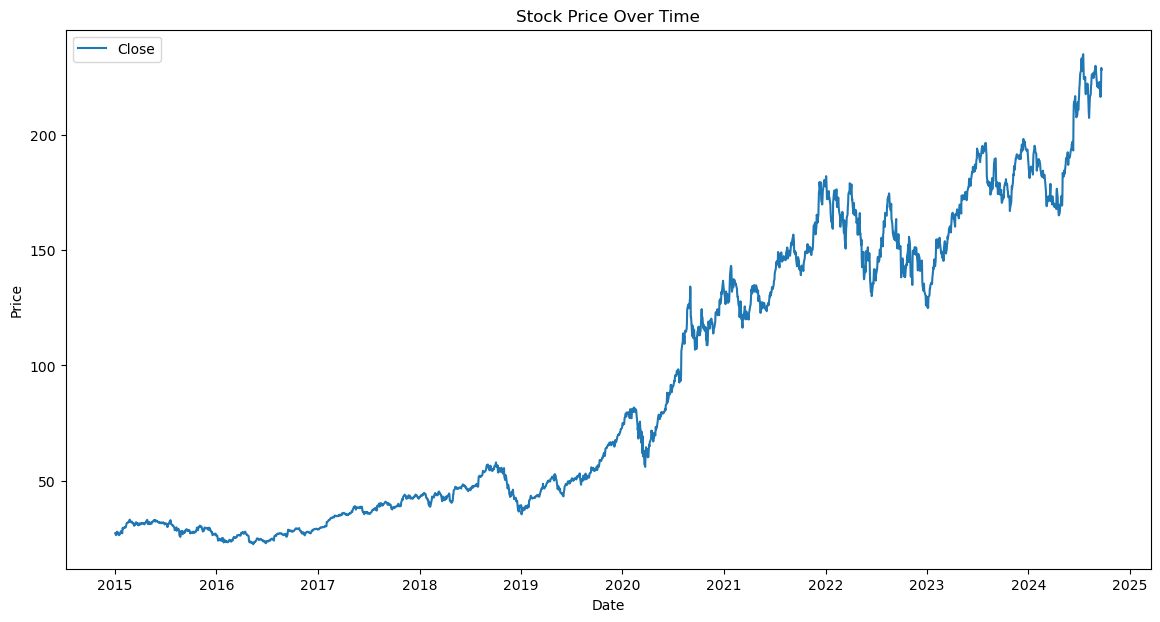

In [4]:
def plot_chart(data):
    plt.figure(figsize=(14,7))
    plt.plot(data['Date'], data['Close'], label='Close')
    plt.title('Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.show()

plot_chart(df)

In [5]:
# Keep only the close price
df = df[ 'Close']
df.head()

0    27.332500
1    26.562500
2    26.565001
3    26.937500
4    27.972500
Name: Close, dtype: float64

In [8]:
train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(1712, 1)
(734, 1)


In [12]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_training_array  = scaler.fit_transform(train)
test = scaler.transform(test)

train[0:5]

array([[0.03540137],
       [0.0296596 ],
       [0.02967825],
       [0.03245592],
       [0.04017375]])

In [14]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 
print(x_train.shape)

(1612, 100, 1)


In [15]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train ,epochs = 50)

Epoch 1/50
51/51 [==============================] - 15s 165ms/step - loss: 0.0423 - MAE: 0.1327
Epoch 2/50
51/51 [==============================] - 8s 159ms/step - loss: 0.0078 - MAE: 0.0553
Epoch 3/50
51/51 [==============================] - 8s 159ms/step - loss: 0.0072 - MAE: 0.0535
Epoch 4/50
51/51 [==============================] - 8s 157ms/step - loss: 0.0058 - MAE: 0.0468
Epoch 5/50
18/51 [=========>....................] - ETA: 6s - loss: 0.0044 - MAE: 0.0427

KeyboardInterrupt: 